In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import numpy as np
import json
import matplotlib.pyplot as plt

In [8]:
# Read the dataset that merged the Global income and Cost and affordability of healthy diets
merged_pd = pd.read_csv("../cleaned_files/merged_income_diet_final.csv")
merged_pd.head(20)

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
0,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,3.21,3.66
1,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7007,Cost of starchy staples,PPP dollar per person per day,0.54,0.57
2,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7008,Cost of animal source foods,PPP dollar per person per day,0.97,1.00
3,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,0.39
4,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7010,Cost of vegetables,PPP dollar per person per day,0.43,0.58
5,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7011,Cost of fruits,PPP dollar per person per day,0.49,0.88
6,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7012,Cost of oils and fats,PPP dollar per person per day,0.12,0.24
7,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7005,Percentage of the population unable to afford ...,%,49.30,54.10
8,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7006,Number of people unable to afford a healthy di...,million No,1.40,1.50
9,Austria,2017.0,41.906,27.90,8.50,14.20,18.00,22.70,36.6,45378.0,...,1.057751,Europe,OECD,High income,11,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,2.06,2.43


In [17]:
cost_dietary_df = merged_pd[(merged_pd['Item Code'] == 7007) | (merged_pd['Item Code'] == 7008) | (merged_pd['Item Code'] == 7009) | (merged_pd['Item Code'] == 7010) | (merged_pd['Item Code'] == 7011) | (merged_pd['Item Code'] == 7012)]
cost_dietary_df.head() 

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
1,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7007,Cost of starchy staples,PPP dollar per person per day,0.54,0.57
2,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7008,Cost of animal source foods,PPP dollar per person per day,0.97,1.00
3,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,0.39
4,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7010,Cost of vegetables,PPP dollar per person per day,0.43,0.58
5,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7011,Cost of fruits,PPP dollar per person per day,0.49,0.88


In [22]:
selected_columns = ['country', 'Item', 'Unit', 'Y2017', 'incomegroup']
dietary_df = cost_dietary_df[selected_columns]
dietary_df.head()

,country,Item,Unit,Y2017,incomegroup
1,Armenia,Cost of starchy staples,PPP dollar per person per day,0.54,Upper middle income
2,Armenia,Cost of animal source foods,PPP dollar per person per day,0.97,Upper middle income
3,Armenia,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,Upper middle income
4,Armenia,Cost of vegetables,PPP dollar per person per day,0.43,Upper middle income
5,Armenia,Cost of fruits,PPP dollar per person per day,0.49,Upper middle income


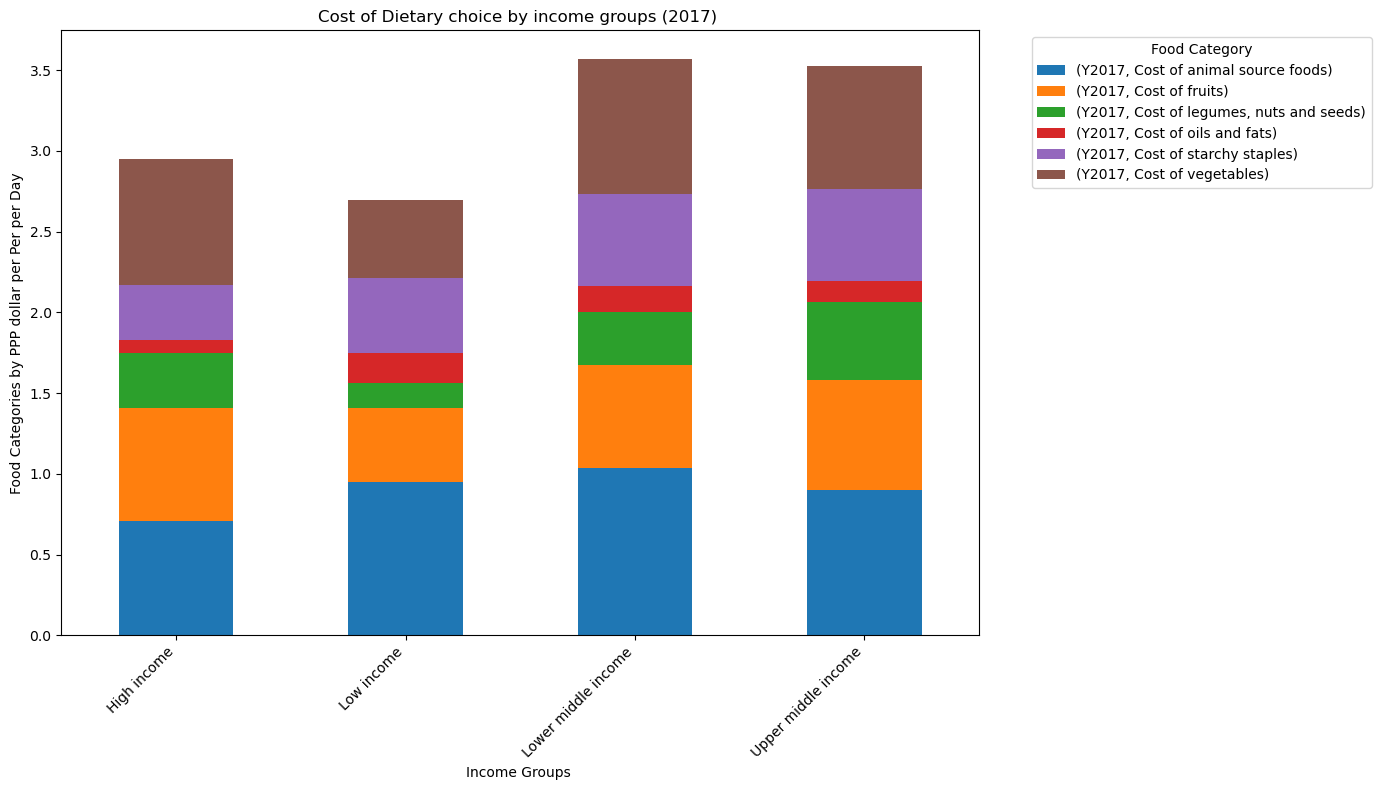

In [27]:
cost_diet = dietary_df[dietary_df['incomegroup'].isin(dietary_df['incomegroup'].unique()[:10])]
df_pivot = cost_diet.pivot_table(index='incomegroup', columns='Item', values=['Y2017', ])
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xticks(rotation=45, ha='right')
plt.title('Cost of Dietary choice by income groups (2017) ')
plt.xlabel('Income Groups ')
plt.ylabel('Food Categories by PPP dollar per Per per Day')
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
cost_dietary_df_7007 = cost_dietary_df.loc[cost_dietary_df['Item Code'] == 7007, : ]
cost_dietary_df_7007['Y2017']

1      0.54
10     0.23
19     0.51
28     0.22
37     0.54
46     0.44
55     0.50
64     0.43
73     0.35
82     0.55
91     0.62
100    0.50
109    0.42
118    0.30
127    0.24
136    0.45
145    0.68
154    0.81
163    0.33
172    0.19
181    0.25
190    0.55
199    0.24
208    0.55
217    0.41
226    0.64
235    0.41
244    0.69
253    0.33
262    0.34
271    0.22
280    0.68
289    0.43
298    0.53
307    0.33
316    0.37
325    0.21
334    0.33
343    0.51
352    0.31
359    0.52
368    0.57
377    0.69
386    0.47
395    0.59
404    0.32
413    0.27
422    0.36
431    0.58
440    0.57
449    0.35
458    0.29
467    0.28
476    0.59
485    0.47
494    0.21
503    0.90
512    0.49
521    0.38
Name: Y2017, dtype: float64

In [11]:
#Check for unique Income groups from the dataframe
cost_dietary_df['incomegroup'].unique()

array(['Upper middle income', 'High income', 'Lower middle income',
       'Low income'], dtype=object)

In [12]:
#Check for unique dietary choices from the dataframe
cost_dietary_df['Item'].unique()

array(['Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats'], dtype=object)

In [7]:
#Check for unique dietary choices from the dataframe
merged_pd['Item Code'].unique()

array([7004, 7007, 7008, 7009, 7010, 7011, 7012, 7005, 7006])

# Cost related to dietary choices across high, upper-middle, lower-middle, and low-income populations, particularly regarding healthy versus unhealthy foods?

In [5]:
# Create an array for Income groups for the countries in the dataset as x-axis
dietary_cost = [['Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats']]
x_axis = np.arange(len(dietary_cost))

In [6]:
# Create an array for Income groups for the countries in the dataset as x-axis
income_groups = [['Upper middle income', 'High income', 'Lower middle income',
       'Low income']]
x_axis = np.arange(len(income_groups))

In [ ]:
cost_dchoices = [10, 20, 30, 40, 50]

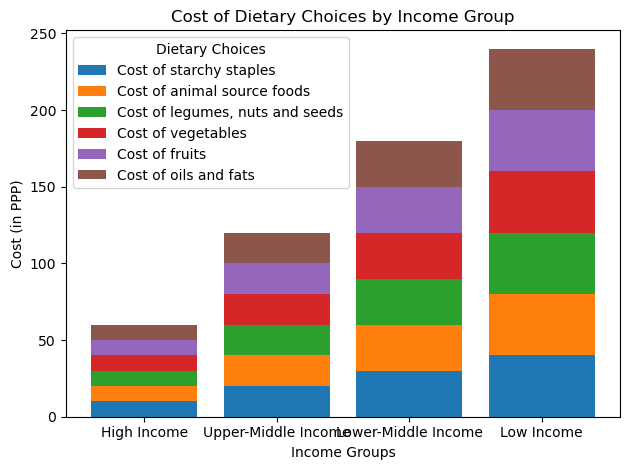

In [13]:
# Sample data for dietary choices
income_groups = ['High Income', 'Upper-Middle Income', 'Lower-Middle Income', 'Low Income']
dietary_choices = ['Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats']

# Hypothetical costs in dollars for each dietary choice across different income groups
costs = {
    'Cost of starchy staples': [cost_dietary_df['Y2017']],  # costs for each income group
    'Cost of animal source foods': [10, 20, 30, 40],
    'Cost of legumes, nuts and seeds': [10, 20, 30, 40],
    'Cost of vegetables': [10, 20, 30, 40],
    'Cost of fruits': [10, 20, 30, 40],
    'Cost of oils and fats': [10, 20, 30, 40],
}

# Set up the figure and the axes
fig, ax = plt.subplots()

# Initialize a bottom variable for stacking the bars
bottom_values = np.zeros(len(income_groups))

# Create the stacked bar chart
for dietary_choice in dietary_choices:
    ax.bar(income_groups, costs[dietary_choice], label=dietary_choice, bottom=bottom_values)
    bottom_values += costs[dietary_choice]  # Update the bottom values for the next stack

# Adding labels and title
ax.set_xlabel('Income Groups')
ax.set_ylabel('Cost (in PPP)')
ax.set_title('Cost of Dietary Choices by Income Group')
ax.legend(title='Dietary Choices')

# Display the chart
plt.tight_layout()  # Adjusts the layout for better spacing
plt.show()

In [ ]:
# Sample data for dietary choices
income_groups = ['High Income', 'Upper-Middle Income', 'Lower-Middle Income', 'Low Income']
dietary_choices = ['Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats']

# Hypothetical costs in dollars for each dietary choice across different income groups
costs = {
    'Cost of starchy staples': [10, 20, 30, 40],  # costs for each income group
    'Cost of animal source foods': [10, 20, 30, 40],
    'Cost of legumes, nuts and seeds': [10, 20, 30, 40],
    'Cost of vegetables': [10, 20, 30, 40],
    'Cost of fruits': [10, 20, 30, 40],
    'Cost of oils and fats': [10, 20, 30, 40],
}

# Set up the figure and the axes
fig, ax = plt.subplots()

# Initialize a bottom variable for stacking the bars
bottom_values = np.zeros(len(income_groups))

# Create the stacked bar chart
for dietary_choice in dietary_choices:
    ax.bar(income_groups, costs[dietary_choice], label=dietary_choice, bottom=bottom_values)
    bottom_values += costs[dietary_choice]  # Update the bottom values for the next stack

# Adding labels and title
ax.set_xlabel('Income Groups')
ax.set_ylabel('Cost (in PPP)')
ax.set_title('Cost of Dietary Choices by Income Group')
ax.legend(title='Dietary Choices')

# Display the chart
plt.tight_layout()  # Adjusts the layout for better spacing
plt.show()

In [ ]:
# Create a grouped bar chart to show the proportion of the population’s ability to afford healthy versus unhealthy food among different income levels. 
# This can include subcategories for various food types, such as fruits, vegetables, processed foods, etc
# Create an array for Income groups for the countries in the dataset as x-axis
income_groups = [['Upper middle income', 'High income', 'Lower middle income',
       'Low income']]
# Create an array for cost related to dietary choices for the countries in the dataset as y-axis 

